In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from collections import Counter

In [3]:

df = pd.read_csv("./weather_forecast_data.csv")
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    19.096119  71.651723   14.782324    48.699257   987.954760  no rain
1    27.112464  84.183705   13.289986    10.375646  1035.430870  no rain
2    20.433329  42.290424    7.216295     6.673307  1033.628086  no rain
3    19.576659  40.679280    4.568833    55.026758  1038.832300  no rain
4    19.828060  93.353211    0.104489    30.687566  1009.423717  no rain

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2475 non-null   float64
 1   Humidity     2460 non-null   float64
 2   Wind_Speed   2468 non-null   float64
 3   Cloud_Cover  2467 non-null   float64
 4   Pressure     2473 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB
None

Summary Statisti


Missing Data in Each Column:
Temperature    25
Humidity       40
Wind_Speed     32
Cloud_Cover    33
Pressure       27
Rain            0
dtype: int64


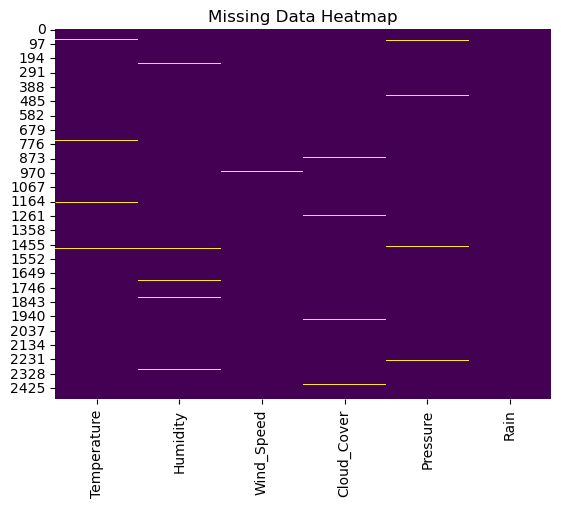

In [6]:
#check for missing data
missing_data = df.isnull().sum()
print("\nMissing data in each column:")
print(missing_data)

#visualizing the missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [8]:
#handling missing values by replacing them with the mean
df = df.fillna(df.select_dtypes(include='number').mean())
print("\nData after filling missing values with mean:")
print(df.info())


Data After Filling Missing Values with Mean:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2500 non-null   float64
 1   Humidity     2500 non-null   float64
 2   Wind_Speed   2500 non-null   float64
 3   Cloud_Cover  2500 non-null   float64
 4   Pressure     2500 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB
None


In [9]:
df.isnull().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

In [10]:
#check the range of each feature
print("\nFeature ranges (before scaling):")
print(df.describe())



Feature ranges (before scaling):
       Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.573777    64.366909     9.911826    49.808770  1014.409327
std       7.295628    19.813325     5.743575    28.869772    20.072933
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.417898    47.493987     4.829795    24.817296   997.190281
50%      22.573777    64.366909     9.911826    49.808770  1014.095390
75%      28.934369    81.445049    14.889660    74.989410  1031.606187
max      34.995214    99.997481    19.999132    99.997795  1049.985593


In [50]:
#features (X) and target (y)
features=df.drop(columns=['Rain'])
target=df['Rain']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(features, target, test_size=0.2, random_state=42)
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")

x_train: (1750, 5), x_test: (750, 5)


In [51]:
scaler = StandardScaler()
#to fit the scaler on the training data and transform both training and testing sets
X_train_scaled=scaler.fit_transform(x_train)
X_test_scaled=scaler.transform(x_test)

X_train_knn_scaled = scaler.fit_transform(X_train_knn) 
X_test_knn_scaled = scaler.transform(X_test_knn)

print("\nFeature ranges (after scaling):")
print("Training set (scaled):")
print(X_train_scaled[:5])
print("\nTesting set (scaled):")
print(X_test_scaled[:5])


Feature ranges (after scaling):
Training set (scaled):
[[ 0.26487738 -1.41559755 -1.05633505 -0.9133814   0.9717672 ]
 [-0.31537346  1.37308203 -1.6839846   0.05608387 -1.63880057]
 [ 0.5208252   0.37348361  1.07160609 -1.67204815  1.039469  ]
 [ 0.91119862  1.65275604  0.50848579  1.25374881  0.62349507]
 [-1.06324827  0.38853883 -0.06610455  0.70230687 -1.0640903 ]]

Testing set (scaled):
[[-0.44342691  0.88181173 -0.8012361  -0.50744914 -0.41012296]
 [-1.73226378 -0.28770621 -1.27006246 -0.09341115 -1.46596205]
 [ 1.16690275  1.5136097   0.50391724 -1.36307098  0.77117991]
 [-1.19004547  1.14927969 -0.19482326  0.63721995  1.56973711]
 [ 1.2654641  -1.19211597 -0.87089162 -1.70750805  1.25468225]]



Training and evaluating: Decision Tree
Accuracy: 0.9933
Precision: 0.9877
Recall: 0.9524

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       666
           1       0.99      0.95      0.97        84

    accuracy                           0.99       750
   macro avg       0.99      0.98      0.98       750
weighted avg       0.99      0.99      0.99       750


Training and evaluating: k-Nearest Neighbors
Accuracy: 0.9667
Precision: 0.8734
Recall: 0.8214

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       666
           1       0.87      0.82      0.85        84

    accuracy                           0.97       750
   macro avg       0.93      0.90      0.91       750
weighted avg       0.97      0.97      0.97       750


Training and evaluating: Naïve Bayes
Accuracy: 0.9667
Precision: 0.9836
Recall: 0.7143

Classification Report:


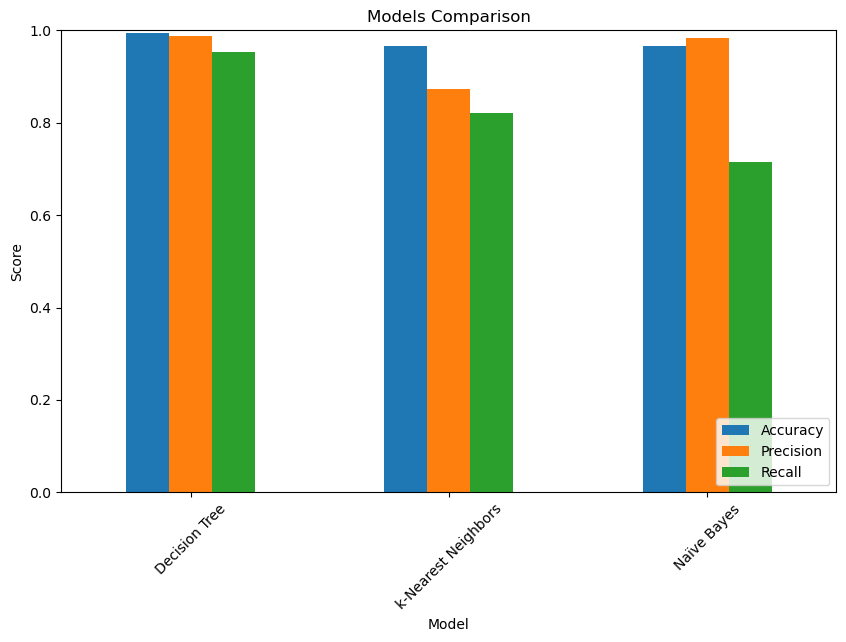

In [52]:
y_train_encoded = y_train.map({'rain': 1, 'no rain': 0})
y_test_encoded = y_test.map({'rain': 1, 'no rain': 0})

y_train_knn_encoded = y_train_knn.map({'rain': 1, 'no rain': 0}) 
y_test_knn_encoded = y_test_knn.map({'rain': 1, 'no rain': 0})

models={
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Naïve Bayes": GaussianNB()
}
results={}
#train and evaluate each model
for name, model in models.items():
    print(f"\nTraining and evaluating: {name}")
    #train the model
    model.fit(X_train_scaled, y_train_encoded)
    #predict on the test set
    y_pred = model.predict(X_test_scaled)
    #model evaluation
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='binary', pos_label=1)
    recall = recall_score(y_test_encoded, y_pred, average='binary', pos_label=1)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test_encoded, y_pred))   
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    }

print("\nModel comparison:")
comparison_df = pd.DataFrame(results).T
print(comparison_df)
#visualize the results
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Models Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()


In [59]:
def knn(X_train, y_train, X_test, k=3): 
    def euclidean_distance(p1, p2): 
        return np.sqrt(np.sum((p1 - p2) ** 2)) 
    preds = [] 
    for test in X_test: 
        distances = [euclidean_distance(test, train) for train in X_train] 
        k_indices = np.argsort(distances)[:k] 
        k_nearest_neighbors = [y_train[i] for i in k_indices] 
        major_label = Counter(k_nearest_neighbors).most_common(1)[0][0] 
        preds.append(major_label) 
    return np.array(preds)

In [60]:
k = 5 
y_pred_knn=knn(X_train_knn_scaled, y_train_knn_encoded.values, X_test_knn_scaled, k=k) 

accuracy_knn = accuracy_score(y_test_knn_encoded, y_pred_knn) 
precision_knn = precision_score(y_test_knn_encoded, y_pred_knn, pos_label=1) 
recall_knn = recall_score(y_test_knn_encoded, y_pred_knn, pos_label=1)

print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")

Accuracy: 0.9680
Precision: 0.9167
Recall: 0.7857


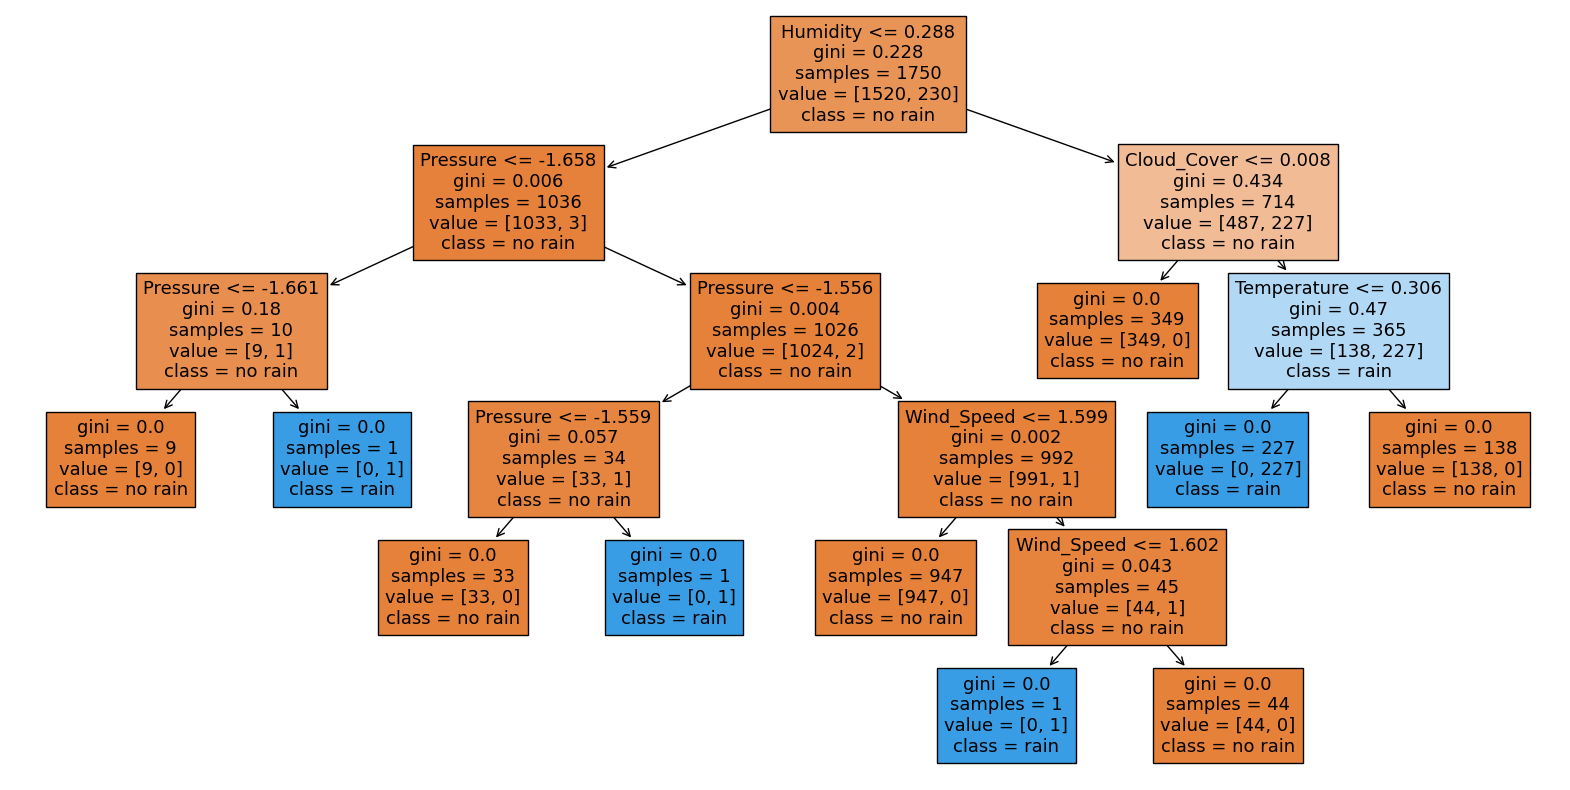

In [61]:
from sklearn.tree import plot_tree

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_scaled, y_train_encoded)
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, filled=True, feature_names=features.columns, class_names=['no rain', 'rain'])
plt.show()


In [62]:
for k in [1, 3, 5, 7, 9]:
    y_pred_knn = knn(X_train_knn_scaled, y_train_knn_encoded.values, X_test_knn_scaled, k=k)
    accuracy_knn = accuracy_score(y_test_knn_encoded, y_pred_knn)
    precision_knn = precision_score(y_test_knn_encoded, y_pred_knn, pos_label=1)
    recall_knn = recall_score(y_test_knn_encoded, y_pred_knn, pos_label=1)
    print(f"k={k}: Accuracy={accuracy_knn:.2f}, Precision={precision_knn:.2f}, Recall={recall_knn:.2f}")


k=1: Accuracy=0.97, Precision=0.84, Recall=0.88
k=3: Accuracy=0.97, Precision=0.89, Recall=0.84
k=5: Accuracy=0.97, Precision=0.92, Recall=0.79
k=7: Accuracy=0.97, Precision=0.88, Recall=0.80
k=9: Accuracy=0.97, Precision=0.90, Recall=0.82


In [63]:
sklearn_knn = []
for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn_scaled, y_train_knn_encoded)
    y_pred_sklearn = knn.predict(X_test_knn_scaled)
    acc = accuracy_score(y_test_knn_encoded, y_pred_sklearn)
    prec = precision_score(y_test_knn_encoded, y_pred_sklearn)
    rec = recall_score(y_test_knn_encoded, y_pred_sklearn)
    sklearn_knn.append({'k': k, 'Accuracy': acc, 'Precision': prec, 'Recall': rec})
    print(f"sklearn kNN (k={k}) - Accuracy: {acc:.2f}, Precision: {prec:.2f}, Recall: {rec:.2f}")


sklearn kNN (k=1) - Accuracy: 0.97, Precision: 0.84, Recall: 0.88
sklearn kNN (k=3) - Accuracy: 0.97, Precision: 0.89, Recall: 0.84
sklearn kNN (k=5) - Accuracy: 0.97, Precision: 0.92, Recall: 0.79
sklearn kNN (k=7) - Accuracy: 0.97, Precision: 0.88, Recall: 0.80
sklearn kNN (k=9) - Accuracy: 0.97, Precision: 0.90, Recall: 0.82
